<a href="https://colab.research.google.com/github/WambuiN/DS_Core_Week2/blob/main/DSCore_Wambui_Njoroge_IP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [2]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [3]:
 finance_df = pd.read_csv( 'http://bit.ly/FinancialDataset')

 finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [5]:
finance_df.shape

(23524, 13)

Tidying the Dataset


In [6]:
#Checking Duplicates
finance_df.duplicated().any()

False

In [7]:
#Checking Null Values
finance_df.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [4]:
#Dropping Null Values in Dataset
finance_df.dropna(inplace=True)

In [5]:
finance_df.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [6]:
#Dropping columns not useful in analysis
finance_df.drop(['uniqueid', 'The relathip with head','marital_status'], axis=1,inplace=True) 
finance_df.head(3)


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed


In [8]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               23343 non-null  object 
 1   year                  23343 non-null  int64  
 2   Has a Bank account    23343 non-null  object 
 3   Type of Location      23343 non-null  object 
 4   Cell Phone Access     23343 non-null  object 
 5   household_size        23343 non-null  float64
 6   Respondent Age        23343 non-null  float64
 7   gender_of_respondent  23343 non-null  object 
 8   Level of Educuation   23343 non-null  object 
 9   Type of Job           23343 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.0+ MB


Renaming Columns

In [11]:
finance_df.rename(columns = {'Has a Bank account':'BANK_ACCOUNT', 'Type of Location': 'LOCATION', 'Cell Phone Access': 'PHONE_ACCESS','	gender_of_respondent': 'GENDER'}, inplace = True) 

In [12]:
finance_df.rename(columns = {'Respondent Age':'AGE', 'Level of Educuation': 'EDUCATION_LEVEL', 'Type of Job': 'JOB','	country': 'COUNTRY','year': 'YEAR'}, inplace = True) 

In [14]:
finance_df.rename(columns = {'country':'COUNTRY', 'gender_of_respondent': 'GENDER'}, inplace = True)

In [15]:
finance_df.head(3)

,COUNTRY,YEAR,BANK_ACCOUNT,LOCATION,PHONE_ACCESS,household_size,AGE,GENDER,EDUCATION_LEVEL,JOB
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed


In [43]:
# Determining outliers in the Dataset
finance_df["AGE"].kurt()

0.09844652254807196

There are no outliers in the Dataset

UNIVARIATE ANALYSIS

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account

In [9]:
# get the value counts of the 'gender' variable
finance_df.gender_of_respondent.value_counts()

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

In [16]:
#Get the number of account holders
finance_df.BANK_ACCOUNT.value_counts()

No     20046
Yes     3297
Name: BANK_ACCOUNT, dtype: int64

There are more bank account holders in this population


In [33]:
#finance_df.groupby(['Name', 'Qualification']) 
finance_df.groupby(['GENDER','LOCATION','PHONE_ACCESS','BANK_ACCOUNT'])['BANK_ACCOUNT'].count()

GENDER  LOCATION  PHONE_ACCESS  BANK_ACCOUNT
Female  Rural     No            No              2158
                                Yes               34
                  Yes           No              5606
                                Yes              689
        Urban     No            No              1848
                                Yes               17
                  Yes           No              2675
                                Yes              740
Male    Rural     No            No              1027
                                Yes               37
                  Yes           No              3810
                                Yes              903
        Urban     No            No               872
                                Yes               16
                  Yes           No              2050
                                Yes              861
Name: BANK_ACCOUNT, dtype: int64

In [44]:
finance_df.groupby(['GENDER','PHONE_ACCESS','COUNTRY'])['BANK_ACCOUNT'].count()

GENDER  PHONE_ACCESS  COUNTRY 
Female  No            Kenya        811
                      Rwanda      1008
                      Tanzania    1785
                      Uganda       453
        Yes           Kenya       2669
                      Rwanda      4165
                      Tanzania    1947
                      Uganda       929
Male    No            Kenya        472
                      Rwanda       469
                      Tanzania     828
                      Uganda       183
        Yes           Kenya       2112
                      Rwanda      3042
                      Tanzania    1940
                      Uganda       530
Name: BANK_ACCOUNT, dtype: int64

In [46]:
finance_df.groupby(['COUNTRY','PHONE_ACCESS'])['BANK_ACCOUNT'].count()

COUNTRY   PHONE_ACCESS
Kenya     No              1283
          Yes             4781
Rwanda    No              1477
          Yes             7207
Tanzania  No              2613
          Yes             3887
Uganda    No               636
          Yes             1459
Name: BANK_ACCOUNT, dtype: int64

In [50]:
finance_df.groupby(['COUNTRY','GENDER'])['BANK_ACCOUNT'].count()

COUNTRY   GENDER
Kenya     Female    3480
          Male      2584
Rwanda    Female    5173
          Male      3511
Tanzania  Female    3732
          Male      2768
Uganda    Female    1382
          Male       713
Name: BANK_ACCOUNT, dtype: int64

In [54]:
finance_df.groupby(['COUNTRY', 'PHONE_ACCESS'])['AGE'].mean()

COUNTRY   PHONE_ACCESS
Kenya     No              41.016368
          Yes             39.245555
Rwanda    No              46.538930
          Yes             37.788261
Tanzania  No              40.230004
          Yes             37.307692
Uganda    No              38.106918
          Yes             34.359150
Name: AGE, dtype: float64

In [55]:
finance_df.groupby(['COUNTRY', 'BANK_ACCOUNT'])['AGE'].mean()

COUNTRY   BANK_ACCOUNT
Kenya     No              39.196963
          Yes             40.885526
Rwanda    No              39.312736
          Yes             38.997994
Tanzania  No              38.449076
          Yes             38.811352
Uganda    No              35.559561
          Yes             34.834254
Name: AGE, dtype: float64

Women have both more greater access to phones and have bank accounts

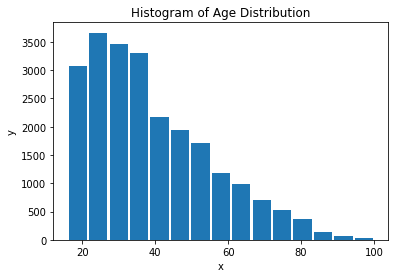

In [37]:
ages = finance_df['AGE']

plt.hist(ages, bins=15, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Age Distribution') 
plt.show()

This shows majority of the popilations are between 20 and 40 years of age

In [41]:
# Finding the min and max values of the age
finance_df_max = finance_df["AGE"].max()
finance_df_min = finance_df["AGE"].min()

# Calculating the range
finance_df_max - finance_df_min

84.0

BIVARIATE ANALYSIS

Which individuals are most likely to have or use a bank account

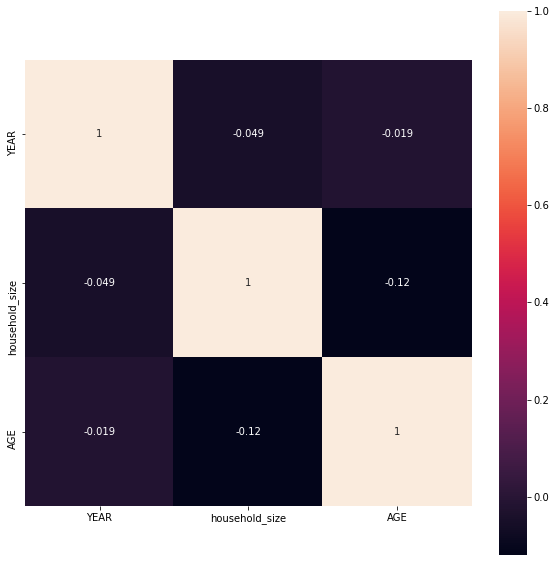

In [39]:
# create a heatmap of the correlations of the variables in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(finance_df.corr(), annot=True, square=True) 

The highest correleation is 

Summary and Recommendations

Focus on Uganda in terms of increase in number of users to access bank account
Invest more in males in the Urban areas to increase reach
Target more Female  because Female have an inclination to banking

